In [1]:
# Fazendo os Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gas-prices-in-brazil/2004-2021.tsv


In [2]:
# Importando o DataFrame

df = pd.read_csv("../input/gas-prices-in-brazil/2004-2021.tsv",sep="\t")

df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [3]:
df.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
count,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000
mean,221.066461,11.473440,0.684132,9.977821,13.233902,0.045298
std,387.940239,19.161823,1.403317,16.433783,22.451445,0.024763
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000
25%,39.000000,2.157000,0.075000,1.989000,2.420000,0.029000
50%,99.000000,2.899000,0.121000,2.690000,3.200000,0.041000
75%,226.000000,4.026000,0.204000,3.790000,4.589000,0.058000
max,4167.000000,107.500000,10.748000,100.000000,120.000000,0.395000


ESTADO
SAO PAULO              4167
MINAS GERAIS           1532
SANTA CATARINA         1416
RIO DE JANEIRO         1361
PARANA                  997
RIO GRANDE DO SUL       924
GOIAS                   766
BAHIA                   625
PERNAMBUCO              539
CEARA                   493
DISTRITO FEDERAL        419
AMAZONAS                383
ESPIRITO SANTO          334
MATO GROSSO DO SUL      298
PARA                    272
MATO GROSSO             269
RONDONIA                238
MARANHAO                204
PARAIBA                 200
TOCANTINS               192
RIO GRANDE DO NORTE     183
ALAGOAS                 178
PIAUI                   145
ACRE                    119
SERGIPE                  96
RORAIMA                  93
AMAPA                    55
Name: NÚMERO DE POSTOS PESQUISADOS, dtype: int64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

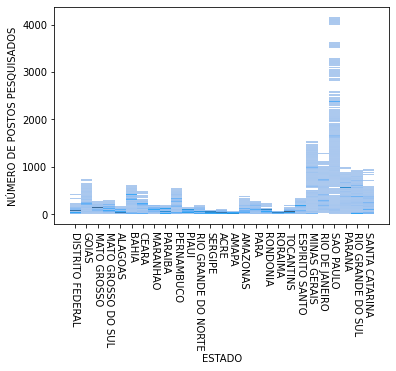

In [4]:
#Análise de número de postos por Estados em ordem decrescente

dfnumpostos = df.groupby(['ESTADO']).max()['NÚMERO DE POSTOS PESQUISADOS']
print(dfnumpostos.sort_values(ascending = False))

ax = sns.histplot(data=df , x="ESTADO", y="NÚMERO DE POSTOS PESQUISADOS")
plt.xticks(rotation=270)


In [5]:
#Análise de preço médio de revenda em ordem decrescente

dfpreco = df.query("PRODUTO == 'GASOLINA COMUM'").groupby(['ESTADO']).mean()['PREÇO MÉDIO REVENDA'].sort_values(ascending = False).reset_index()
dfpreco.sort_values('PREÇO MÉDIO REVENDA', ascending=False)
dfpreco

,ESTADO,PREÇO MÉDIO REVENDA
0,ACRE,3.574378
1,TOCANTINS,3.324233
2,RONDONIA,3.317381
3,MATO GROSSO,3.315802
4,RIO DE JANEIRO,3.307758
5,PARA,3.291103
6,ALAGOAS,3.263207
7,RIO GRANDE DO SUL,3.217851
8,RORAIMA,3.215751
9,BAHIA,3.213920


In [6]:
df['PRODUTO'] = df['PRODUTO'].str.replace('OLEO DIESEL S10', 'ÓLEO DIESEL S10')
df['PRODUTO'] = df['PRODUTO'].str.replace('OLEO DIESEL', 'ÓLEO DIESEL')
df["PRODUTO"].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'GASOLINA ADITIVADA'], dtype=object)

In [7]:
# Preço médio de revenda dos combustiveis 
dfmediapreco = df.groupby(["PRODUTO"]).mean()['PREÇO MÉDIO REVENDA']

print("Preço Médio de Revenda de 2004 a 2021:\n",dfmediapreco)

Preço Médio de Revenda de 2004 a 2021:
 PRODUTO
ETANOL HIDRATADO       2.444979
GASOLINA ADITIVADA     5.049475
GASOLINA COMUM         3.195409
GLP                   47.655054
GNV                    2.033289
ÓLEO DIESEL            2.550975
ÓLEO DIESEL S10        3.269581
Name: PREÇO MÉDIO REVENDA, dtype: float64


In [8]:
df['DATA FINAL'] =  pd.to_datetime(df['DATA FINAL'], format='%Y/%m/%d')
df['ANO'] = df['DATA FINAL'].dt.year
df['MES'] = df['DATA FINAL'].dt.month
df['ANO/MES']=pd.to_datetime({'day': 1,'month': df['MES'],'year': df['ANO']})

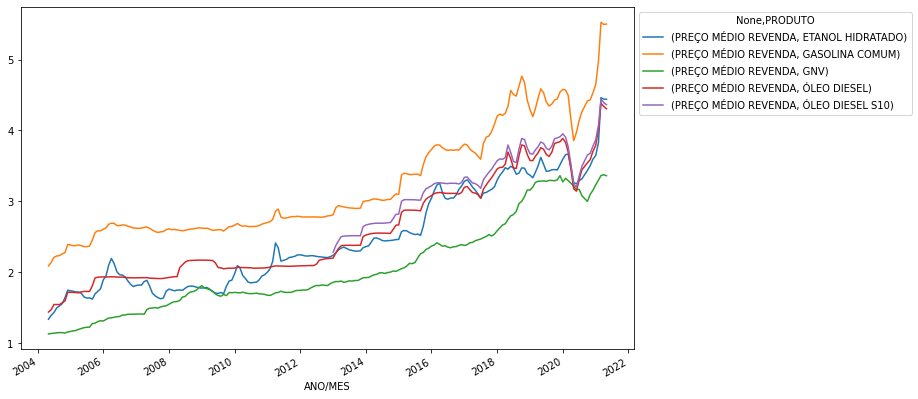

In [9]:
# Análise gráfica do preço médio de revenda dos combustíveis

dt1=df.query("PRODUTO != 'GLP' & PRODUTO != 'GASOLINA ADITIVADA'")
dt1=dt1[['PRODUTO','ANO/MES','PREÇO MÉDIO REVENDA']].groupby(['PRODUTO','ANO/MES']).mean().sort_values(by=['PRODUTO','ANO/MES'], ascending=True)
dt2=dt1.pivot_table(index=['ANO/MES'], columns=['PRODUTO'], values=['PREÇO MÉDIO REVENDA'])
dt2.plot(kind='line',figsize=(11,7)).get_legend().set_bbox_to_anchor((1, 1))

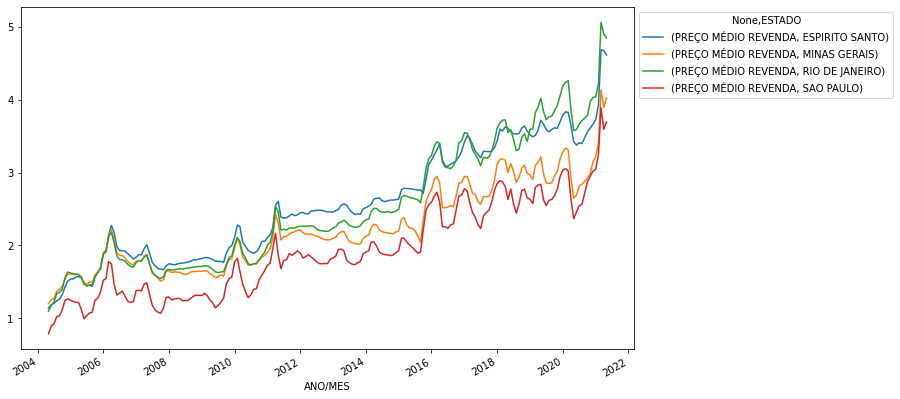

In [10]:
# Análise gráfica do preço médio de revenda na Região Sudeste

df1=df.query("PRODUTO == 'ETANOL HIDRATADO' & REGIÃO=='SUDESTE'")
df1=df1[['ESTADO','ANO/MES','PREÇO MÉDIO REVENDA']].groupby(['ESTADO','ANO/MES']).mean().sort_values(by=['ESTADO','ANO/MES'], ascending=True)
df2=df1.pivot_table(index=['ANO/MES'], columns=['ESTADO'], values=['PREÇO MÉDIO REVENDA'])

df2.plot(kind='line',figsize=(11,7)).get_legend().set_bbox_to_anchor((1, 1))

In [11]:
np.random.seed(100)

In [12]:
# Treino e Teste

dfgascomum = df.query('PRODUTO =="GASOLINA COMUM"')

X = dfgascomum.drop(['PREÇO MÉDIO REVENDA','DATA INICIAL','DATA FINAL','REGIÃO', 'ESTADO','PRODUTO','UNIDADE DE MEDIDA','MARGEM MÉDIA REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO','DESVIO PADRÃO DISTRIBUIÇÃO','PREÇO MÍNIMO DISTRIBUIÇÃO','PREÇO MÁXIMO DISTRIBUIÇÃO','COEF DE VARIAÇÃO DISTRIBUIÇÃO','ANO/MES'], axis=1)

y = dfgascomum['PREÇO MÉDIO REVENDA']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.30)

In [13]:
# Criando o objeto reg_all
reg_all = LinearRegression()

# Aplicando aos dados
reg_all.fit(X_train, y_train)

# Predicao
y_pred = reg_all.predict(X_test)

#  R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

R^2: 0.991508891182053
Root Mean Squared Error: 0.07074875315812063
Mean Absolute Error: 0.05308211809082592
Mean Squared Error: 0.005005386073428684
